<a href="https://colab.research.google.com/github/kuromelodylee/knou/blob/master/PCA%20LDA%20homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-1. 클래스데이터 생성 및 산점도 그리기

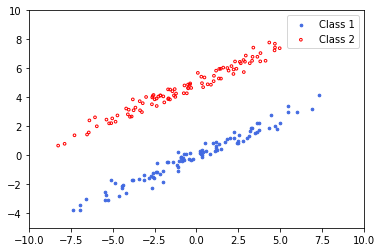

In [74]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt


N = 100
m1 = np.array([0, 0])
m2 = np.array([0, 5])
s = np.array([[10, 2], [2, 1]])

X1 = np.random.randn(N,2) @ np.sqrt(s) + np.matlib.repmat(m1, N, 1)
X2 = np.random.randn(N,2) @ np.sqrt(s) + np.matlib.repmat(m2, N, 1)

plt.scatter(X1[:,0], X1[:,1], label= "Class 1", s = 7, color = 'royalblue')
plt.scatter(X2[:,0], X2[:,1], label= "Class 2", s =7, edgecolors='r', facecolors='none')
plt.axis([-10,10,-5,10])

plt.legend(loc = 'upper right')
plt.show()

1-2. PCA 및 LDA 주선분 벡터를 찾고 그리기

In [75]:
# PCA 고유치 분석
X = np.vstack([X1, X2])
M = np.mean(X, axis=0)
S = np.cov(X, rowvar=False)
eigVecPCA, eigValPCA, Upca = np.linalg.svd(S)

M, eigVecPCA, eigValPCA

(array([-0.46026683,  2.27987667]), array([[-0.79827089, -0.60229859],
        [-0.60229859,  0.79827089]]), array([15.36151976,  4.71773924]))

In [76]:
#LDA 고유치 분석
N = 100
m1, m2 = np.mean(X1, axis=0), np.mean(X2, axis=0)
Sw = N * np.cov(X1, rowvar=False) + N * np.cov(X2, rowvar=False) #within scatter 클래스내 공분산
Sb = (m1 - m2).reshape(-1,1) * (m1-m2) #between scatter 클래스간 공분산 ((m1 - m2).reshape(-1,1) @ (m1-m2).reshape(1,-1) 같음)

#고유치분석, 행렬간공분산 * 클래스내 공분산역행렬
eigVecLDA, eigValLDA, Ulda = np.linalg.svd(Sb @ np.linalg.inv(Sw)) # octave와 같은 동일한배열로 출력된다.

Sb, eigVecLDA, eigValLDA

(array([[ 0.25493871, -2.38703825],
        [-2.38703825, 22.35027977]]), array([[-0.10619732,  0.99434508],
        [ 0.99434508,  0.10619732]]), array([1.25374041, 0.        ]))

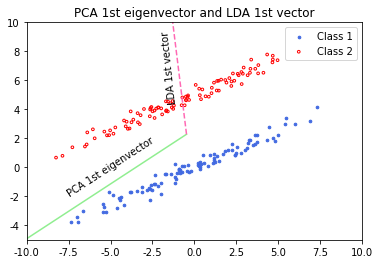

In [114]:
plt.scatter(X1[:,0], X1[:,1], label= "Class 1", s = 7, color = 'royalblue')
plt.scatter(X2[:,0], X2[:,1], label= "Class 2", s =7, edgecolors='r', facecolors='none')
plt.axis([-10,10,-5,10])
#PCA 주성분 벡터 그리기
plt.plot([0, eigVecPCA[0,0] * eigValPCA[0]]+M[0], 
         [0, eigVecPCA[1,0] * eigValPCA[0]]+M[1], c = "lightgreen", ls ="-")
plt.annotate('PCA 1st eigenvector', xy=(-5, -2), xytext=(-5,-2), fontsize=10, ha='center', rotation= 33)
             
#LDA 주성분 벡터 그리기
plt.plot([0, eigVecLDA[0,0] * eigValLDA[0] * 8]+M[0], 
         [0, eigVecLDA[1,0] * eigValLDA[0] * 8]+M[1], c = "hotpink", ls ="--")
plt.annotate('LDA 1st vector', xy=(-1.5, 4.5), xytext=(-1.5, 4.5), fontsize=10, ha='center', rotation= 96)

plt.title("PCA 1st eigenvector and LDA 1st vector")
plt.legend(loc = 'upper right')
plt.show()

1-3. 두결과의 차이 간단히 서술 \

PCA는 위에 그림에서 알수있드시 다차원에서 축소된차원의 최대 분산이 되는 벡터를 가지고 최대한 많은 특징들을 추출할 수 있다. 다만, 클래스가 구분되는 문제에서는 PCA로는 클래스간 특징을 추출 하기에는 한계가 있으므로, LDA는 최대한 클래스가 구분되는 벡터로 차원을 축소할 수 있다.